# Linear Classification Using a Support Vector

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

import os
os.chdir("/content/drive/My Drive/AIMOOC")

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import sklearn.linear_model as lm 
import matplotlib.pyplot as plt

Mounted at /content/drive/


## Read the data
* Label of 0 means it's classified as high-sugar
* Label of 1 means it's classified as high-sodium

In [ ]:
df = pd.read_csv("/content/drive/My Drive/AIMOOC/Modules/Module4/Data/menu.csv")
df 

,Sugars,Sodium,Label
0,3,750,1
1,3,770,1
2,2,780,1
3,2,860,1
4,2,880,1
...,...,...,...
209,103,400,0
210,51,200,0
211,80,1500,0
212,70,1100,0


## Try linear regression

Coefficients: [-12.67917705]
Intercept: 1039.6950895619434
R^2 value: 0.37637770535448356


Text(0.5, 1.0, 'Sugar vs. Sodium level for 214 Food Items (with a Linear Regression Line)')

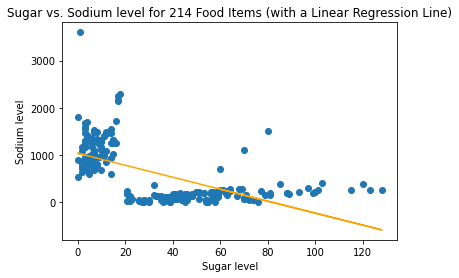

In [ ]:
x = df[["Sugars"]]
y = df["Sodium"]
lin_reg = lm.LinearRegression()
lin_reg.fit(x, y) 
print('Coefficients:', lin_reg.coef_)
print('Intercept:', lin_reg.intercept_)
score = lin_reg.score(x, y)
print('R^2 value:',score)

plt.scatter(x, y)
ypred = lin_reg.predict(x)
plt.plot(x, ypred, color="orange")
plt.xlabel("Sugar level")
plt.ylabel("Sodium level")
plt.title("Sugar vs. Sodium level for 214 Food Items (with a Linear Regression Line)") 

## Plot the data with color-coded label column

Text(0.5, 1.0, 'Sugar vs. Sodium level for 214 Food Items (with a Linear Regression Line)')

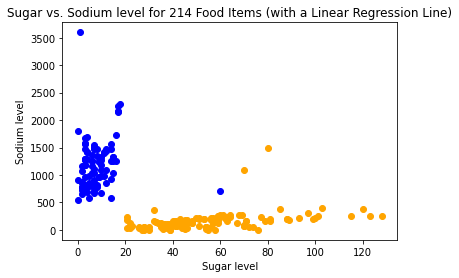

In [ ]:
x = df[["Sugars"]]
y = df["Sodium"]
plt.xlabel("Sugar level")
plt.scatter(df[df["Label"] == 1]["Sugars"],df[df["Label"] == 1]["Sodium"], color = "blue")
plt.scatter(df[df["Label"] == 0]["Sugars"],df[df["Label"] == 0]["Sodium"], color = "orange")
plt.ylabel("Sodium level")
plt.title("Sugar vs. Sodium level for 214 Food Items (with a Linear Regression Line)") 

## Do classification with the support vector machine

R^2 value: 0.9953271028037384


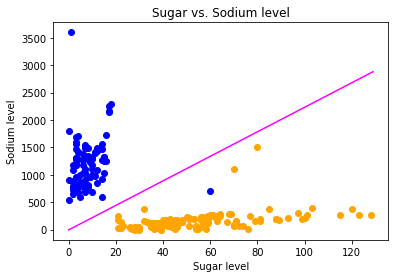

In [ ]:
#Support Vector Linear Classifier
import sklearn.svm as svm

x = df[["Sugars", "Sodium"]]
y = df["Label"] 

clf = svm.SVC(kernel='linear')
clf.fit(x, y) 
score = clf.score(x, y)
print('R^2 value:',score)

def draw_svc_line():
  w = clf.coef_[0]
  slope = -w[0] / w[1]
  b = -clf.intercept_[0] / w[1]
  xx = range(0, 130)
  yy = slope * xx + b
  line = plt.plot(xx, yy, color='magenta')
  plt.scatter(df[df["Label"] == 1]["Sugars"],df[df["Label"] == 1]["Sodium"], color = "blue")
  plt.scatter(df[df["Label"] == 0]["Sugars"],df[df["Label"] == 0]["Sodium"], color = "orange")
  plt.xlabel("Sugar level")
  plt.ylabel("Sodium level")
  plt.title("Sugar vs. Sodium level")

draw_svc_line() 

## Predict label value for a new data point

In [ ]:
print("Prediction for [40, 2000]: ", clf.predict([[40, 2000]])) 

Prediction for [40, 2000]:  [1]
